# Dependencies and Setup

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np


# Crime data file

In [50]:
# connecting to files
crime_data_path = "Output_data/COBRA-2009-2019.csv"

In [51]:
crime_data_df = pd.read_csv(crime_data_path )

crime_data_df.head()

C:\Users\lucas.vianna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330.0,511.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520.0,407.0,NaN,NaN,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282
3,90011218,2009-01-01,2009-01-01,1450,2009-01-01,1510.0,210.0,NaN,NaN,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
4,90011289,2009-01-01,2009-01-01,1600,2009-01-01,1700.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773


# Question 1 - Total number of crimes reported in the past ten years 

In [52]:
crime_data_df.count()

Report Number              342914
Report Date                342914
Occur Date                 342914
Occur Time                 342914
Possible Date              342896
Possible Time              342895
Beat                       342890
Apartment Office Prefix     10094
Apartment Number            68274
Location                   342912
Shift Occurence            342914
Location Type              333698
UCR Literal                342914
UCR #                      342914
IBR Code                   342744
Neighborhood               330551
NPU                        342775
Latitude                   342914
Longitude                  342914
dtype: int64

In [53]:
crimes_reported = crime_data_df["Report Number"].nunique()

crimes_reported

342609

In [54]:
print("There were a total of 342609 crimes reported")

There were a total of 342609 crimes reported


# Question 2 - Total number of distinct crimes reported

In [55]:
unique_crimes = crime_data_df["UCR Literal"].nunique()

unique_crimes

11

# Question 3 - Top 3 Crimes 

In [56]:
# Group data by Crime

crime_group = crime_data_df.groupby('UCR Literal')
                                      
                            

In [57]:
crime_group_df = pd.DataFrame({"Total Count": crime_group["Report Number"].count()})
crime_group_sorted_df = crime_group_df.sort_values("Total Count", ascending=False)

crime_group_sorted_df

,Total Count
UCR Literal,
LARCENY-FROM VEHICLE,105630
LARCENY-NON VEHICLE,81942
BURGLARY-RESIDENCE,49577
AUTO THEFT,47067
AGG ASSAULT,25049
ROBBERY-PEDESTRIAN,17167
BURGLARY-NONRES,10950
ROBBERY-COMMERCIAL,2317
ROBBERY-RESIDENCE,2230


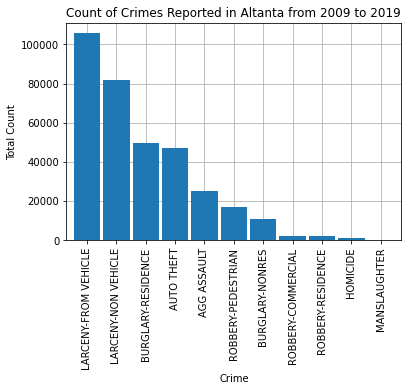

In [58]:
bar_plot = crime_data_df['UCR Literal'].value_counts().plot.bar(width=0.9, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Crime")
bar_plot.set_ylabel("Total Count")
bar_plot.set_title("Count of Crimes Reported in Altanta from 2009 to 2019")                   

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
bar_plot.grid(zorder=0)



In [59]:
print("The top 3 crimes in Atlanta in the past 10 years are: Larceny-From Vehicle, Larceny-Non Vehicle, Burglary-Residence ")

The top 3 crimes in Atlanta in the past 10 years are: Larceny-From Vehicle, Larceny-Non Vehicle, Burglary-Residence 


# Question 4 - Top 10 Dangerous Neighborhoods 

In [60]:
# Group data by Neighborhood

neighborhood_group = crime_data_df.groupby('Neighborhood')
                                      
       

In [61]:
neighborhood_group_df = pd.DataFrame({"Total Count": neighborhood_group["Report Number"].count()})
neighborhood_group_sorted_df = neighborhood_group_df.sort_values("Total Count", ascending=False)

neighborhood_group_sorted_df.head(10)

,Total Count
Neighborhood,
Downtown,25386
Midtown,18240
Old Fourth Ward,9945
West End,8506
Lenox,6203
North Buckhead,5651
Vine City,5506
Greenbriar,5487
Sylvan Hills,5451


In [62]:
top_neighborhoods_df = neighborhood_group_sorted_df.head(10)

top_neighborhoods_df

,Total Count
Neighborhood,
Downtown,25386
Midtown,18240
Old Fourth Ward,9945
West End,8506
Lenox,6203
North Buckhead,5651
Vine City,5506
Greenbriar,5487
Sylvan Hills,5451


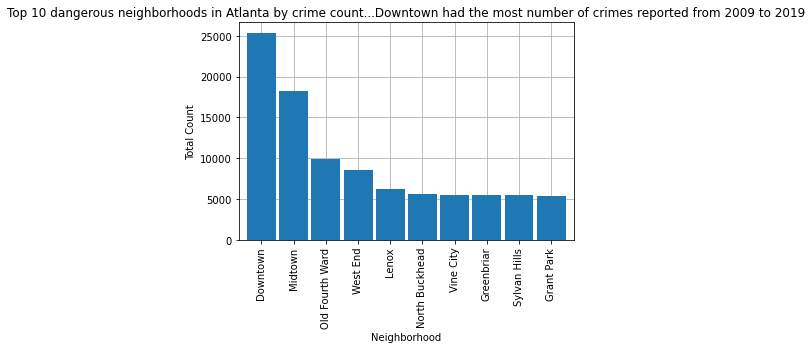

In [63]:
bar_plot = top_neighborhoods_df['Total Count'].plot.bar(width=0.9, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Neighborhood")
bar_plot.set_ylabel("Total Count")
bar_plot.set_title("Top 10 dangerous neighborhoods in Atlanta by crime count...Downtown had the most number of crimes reported from 2009 to 2019")                   

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
bar_plot.grid(zorder=0)



# Question 5 - Top 10 Safest Neighborhoods

In [64]:
neighborhood_group_df = pd.DataFrame({"Total Count": neighborhood_group["Report Number"].count()})
neighborhood_group_sorted1_df = neighborhood_group_df.sort_values("Total Count")

neighborhood_group_sorted1_df.head(10)

,Total Count
Neighborhood,
Englewood Manor,2
State Facility,5
Edmund Park,7
Old Fairburn Village,11
Mt. Paran Parkway,12
Chattahoochee,14
Regency Trace,20
Horseshoe Community,25
Bankhead Courts,30


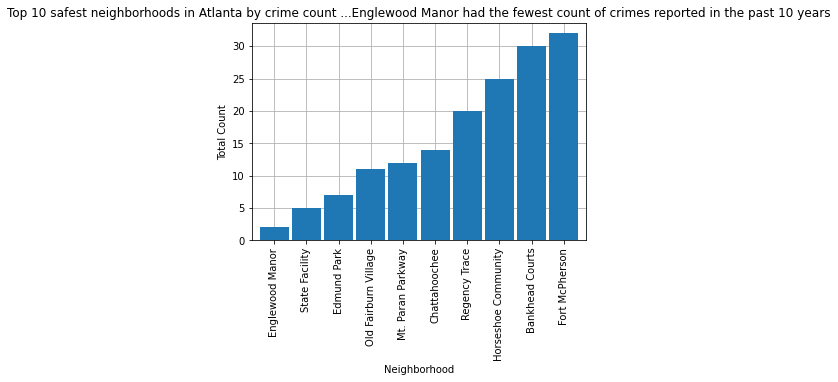

In [65]:
safest_neighborhoods_df = neighborhood_group_sorted1_df.head(10)


bar1_plot = safest_neighborhoods_df['Total Count'].plot.bar(width=0.9, zorder=3)

# Set labels for axes
bar1_plot.set_xlabel("Neighborhood")
bar1_plot.set_ylabel("Total Count")
bar1_plot.set_title("Top 10 safest neighborhoods in Atlanta by crime count ...Englewood Manor had the fewest count of crimes reported in the past 10 years")                   

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
bar1_plot.grid(zorder=0)

# Question 6 - Shift Occurrence with the most crimes reported 

In [66]:
shift_data_analysis = crime_data_df["Shift Occurence"].value_counts()

shift_data_analysis

Evening Watch    145812
Day Watch        115257
Morning Watch     73510
Unknown            8335
Name: Shift Occurence, dtype: int64

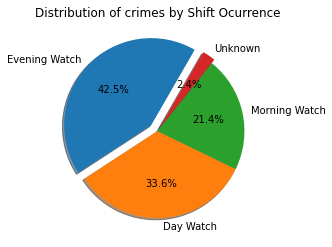

In [97]:
explode = (0.1, 0, 0, 0.05)
shift_pie = shift_data_analysis.plot(kind='pie', explode=explode,autopct='%1.1f%%',shadow=True, startangle=60) 
plt.title('Distribution of crimes by shift ocurrence')
shift_pie.set_ylabel('')

plt.show()


# Summary of Findings 

In [68]:
summary_findings_df = pd.DataFrame({
    
    "Research Questions":["Total number of crimes reported ", "Total number of distinct crimes ", "Top 3 crimes", "Top 10 dangerous neighborhoods", "Top 10 safest neighborhoods", "Shift occurrence with the most crimes " ],
    
    "Findings":["342,609", "11", "Larceny-From Vehicle, Larceny-Non Vehicle, Burglary-Residence", " Downtown, Midtown, Old Fourth Ward, West End, Lenox, North Buckhead, Vine City, Greenbriar, Sylvan, Grant Park", "Englewood Manor, State Facility, Edmund Park, Old Fairburn Village, Mt. Paran Parkway, Chattahoochee, Regency Trace, Horseshoe Community, Bankhead Courts, Fort McPherson", "Evening Watch" ]
    

    
    
    
})

summary_findings_df

,Research Questions,Findings
0,Total number of crimes reported,"342,609"
1,Total number of distinct crimes,11
2,Top 3 crimes,"Larceny-From Vehicle, Larceny-Non Vehicle, Bur..."
3,Top 10 dangerous neighborhoods,"Downtown, Midtown, Old Fourth Ward, West End,..."
4,Top 10 safest neighborhoods,"Englewood Manor, State Facility, Edmund Park, ..."
5,Shift occurrence with the most crimes,Evening Watch


In [69]:
summary1_findings_df = pd.DataFrame({"Research Question":["Total number of crimes reported"],
    
                                    "Findings":[342609]
    
    
})


summary1_findings_df


,Research Question,Findings
0,Total number of crimes reported,342609


In [70]:
summary2_findings_df = pd.DataFrame({"Research Question":["Total number of distinct crimes "],
    
                                    "Findings":[11]
    
    
})


summary2_findings_df


,Research Question,Findings
0,Total number of distinct crimes,11
